In [1]:
%load_ext autoreload
%autoreload 2


import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian_kmers', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-01-17 20:08:00	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian_kmers/datapackage.json
2016-01-17 20:08:00	Parsing datapackage to create a Study object
2016-01-17 20:08:34	Initializing Study
2016-01-17 20:08:34	Initializing Predictor configuration manager for Study
2016-01-17 20:08:34	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-17 20:08:34	Added ExtraTreesClassifier to default predictors
2016-01-17 20:08:34	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-17 20:08:34	Added ExtraTreesRegressor to default predictors
2016-01-17 20:08:34	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-17 20:08:34	Added GradientBoostingClassifier to default predictors
2016-01-17 20:08:34	Predictor GradientBoostingRegressor is of type <class 'sk

In [ ]:
import matplotlib as mpl

from anchor import MODALITY_TO_COLOR

# sns.palplot(sns.color_palette('PRGn', n_colors=2))
direction_to_color = dict(zip(['upstream', 'downstream'], ['#EEEEEE', '#262626']))
sns.palplot(pd.Series(direction_to_color))

# This is the winner!!
import matplotlib as mpl
celltype_palette = sns.color_palette('Greens', n_colors=3)
sns.palplot(celltype_palette)

celltype_palette = map(mpl.colors.rgb2hex, celltype_palette)

phenotype_to_color = dict(zip(['iPSC', 'NPC', "MN", "sMN"], celltype_palette))
phenotype_to_color

In [2]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
!mkdir $folder

figure_folder = '{}/kmer_counting/ttest_0'.format(folder)
! mkdir -p $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian': File exists


## Match known motifs to kmers

In [5]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

# cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [6]:
ls $cisbp_folder/*csv

/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_kvector_456.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_motif_metadata.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/kmers_in_cisbp_motifs_thresh05.csv


In [7]:
cisbp_kmers = pd.read_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder), index_col=0)
cisbp_kmers.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False


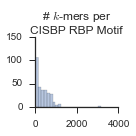

In [8]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 2))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=3)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax), title='# $k$-mers per\nCISBP RBP Motif')
sns.despine()
fig.tight_layout()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [9]:
kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

M255_0.6_PUM1_ENSG00000134644_Homo_sapiens    3153
dtype: int64

In [10]:
from scipy.stats import ttest_1samp

In [11]:
# col = study.supplemental.kmer_zscores.iloc[:, 0]
# statistic, p_value = ttest_1samp(col[cisbp_kmer], col.mean())

In [12]:
kmer_means = study.supplemental.kmer_zscores.mean()

In [13]:
from scipy.stats import mannwhitneyu

In [16]:
# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
        x = intron_col[cisbp_kmer]
        y = intron_col
#         sign = np.sign(x.median() - y.median())
#         statistic, p_value = mannwhitneyu(x, y)
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_utest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif long', 'T-Statistic', '$p$-value',])
print kmer_cisbp_utest_tidy.shape
kmer_cisbp_utest_tidy.head()

(7722, 4)


,Intron,RBP Motif long,T-Statistic,$p$-value
0,upstream400nt_MN_bimodal_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.844958,2.932396e-10
1,upstream400nt_MN_bimodal_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,1.000434,3.210526e-01
2,upstream400nt_MN_bimodal_placental,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,12.567566,7.172346e-25
3,upstream400nt_MN_bimodal_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,21.314694,1.727790e-72
4,upstream400nt_MN_bimodal_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,21.753609,3.787634e-27


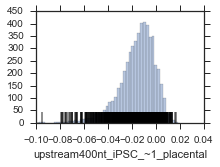

In [17]:
x = study.supplemental.kmer_zscores['upstream400nt_iPSC_~1_placental']
y = x[cisbp_kmers['M231_0.6_EIF2S1_ENSG00000134001_Homo_sapiens']]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=False)
ymin, ymax = ax.get_ylim()
ax.vlines(y, 0, ymax*.1, alpha=0.5)

In [45]:
sns.set(style='ticks', context='talk')

In [59]:
cibsp_id = cisbp_metadata.loc[cisbp_metadata['RBP Name'] == 'HNRNPC'].index[0]

In [72]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/kmer_counting/ttest_0'

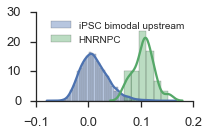

In [73]:
x = study.supplemental.kmer_zscores['upstream400nt_iPSC_bimodal_placental']
y = x[cisbp_kmers[cibsp_id]]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=True, hist=True, label='iPSC bimodal upstream')
sns.distplot(y, kde=True, hist=True, label='HNRNPC')
ax.locator_params(nbins=4)
ax.legend(loc='best', fontsize=10)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/distplot_hnrnpc_vs_ipsc_bimodal_upstream.pdf'.format(figure_folder))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

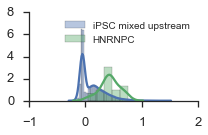

In [75]:
x = study.supplemental.kmer_zscores['upstream400nt_iPSC_multimodal_placental']
y = x[cisbp_kmers[cibsp_id]]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=True, hist=True, label='iPSC mixed upstream')
sns.distplot(y, kde=True, hist=True, label='HNRNPC')
ax.locator_params(nbins=4)
ax.legend(loc='best', fontsize=10)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/distplot_hnrnpc_vs_ipsc_multimodal_upstream.pdf'.format(figure_folder))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

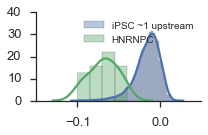

In [78]:
x = study.supplemental.kmer_zscores['upstream400nt_iPSC_~1_placental']
y = x[cisbp_kmers[cibsp_id]]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=True, hist=True, label='iPSC ~1 upstream')
sns.distplot(y, kde=True, hist=True, label='HNRNPC')
ax.locator_params(nbins=4)
ax.legend(loc='best', fontsize=10)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/distplot_hnrnpc_vs_ipsc_~1_upstream.pdf'.format(figure_folder))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

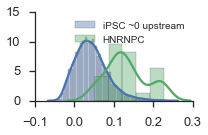

In [79]:
x = study.supplemental.kmer_zscores['upstream400nt_iPSC_~0_placental']
y = x[cisbp_kmers[cibsp_id]]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=True, hist=True, label='iPSC ~0 upstream')
sns.distplot(y, kde=True, hist=True, label='HNRNPC')
ax.locator_params(nbins=4)
ax.legend(loc='best', fontsize=10)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/distplot_hnrnpc_vs_ipsc_~0_upstream.pdf'.format(figure_folder))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

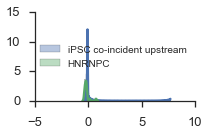

In [81]:
x = study.supplemental.kmer_zscores['upstream400nt_iPSC_middle_placental']
y = x[cisbp_kmers[cibsp_id]]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=True, hist=True, label='iPSC co-incident upstream')
sns.distplot(y, kde=True, hist=True, label='HNRNPC')
ax.locator_params(nbins=4)
ax.legend(loc='best', fontsize=10)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/distplot_hnrnpc_vs_ipsc_co-incident_upstream.pdf'.format(figure_folder))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

In [55]:
y.shape

(1156,)

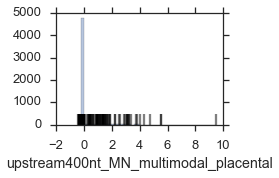

In [82]:
x = study.supplemental.kmer_zscores['upstream400nt_MN_multimodal_placental']
y = x[cisbp_kmers['M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens']]

fig, ax = plt.subplots(figsize=(3, 2))
sns.distplot(x, kde=False)
ymin, ymax = ax.get_ylim()
ax.vlines(y, 0, ymax*.1, alpha=0.5)

In [83]:
kmer_cisbp_utest_tidy['RBP Motif'] = kmer_cisbp_utest_tidy['RBP Motif long'].str.split().str.get(0)
kmer_cisbp_utest_tidy.head()

,Intron,RBP Motif long,T-Statistic,$p$-value,RBP Motif
0,upstream400nt_MN_bimodal_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,9.844958,2.932396e-10,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens
1,upstream400nt_MN_bimodal_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,1.000434,3.210526e-01,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens
2,upstream400nt_MN_bimodal_placental,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,12.567566,7.172346e-25,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...
3,upstream400nt_MN_bimodal_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,21.314694,1.727790e-72,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens
4,upstream400nt_MN_bimodal_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,21.753609,3.787634e-27,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans


In [84]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split()[0].split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [85]:
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


In [86]:
ls $figure_folder

cisbp_kmer_distribution.pdf
distplot_hnrnpc_vs_ipsc_bimodal_upstream.pdf
distplot_hnrnpc_vs_ipsc_co-incident_upstream.pdf
distplot_hnrnpc_vs_ipsc_middle_upstream.pdf
distplot_hnrnpc_vs_ipsc_multimodal_upstream.pdf
distplot_hnrnpc_vs_ipsc_~0_upstream.pdf
distplot_hnrnpc_vs_ipsc_~1_upstream.pdf
intron_kmers_vs_cisbp_t_statistic_filtered_transposed.pdf
intron_kmers_vs_cisbp_u_statistic_filtered.pdf
kmer_zscores_boxplot.pdf
t_statistic_boxplots.pdf
t_statistic_homo_sapiens_clustermap.pdf


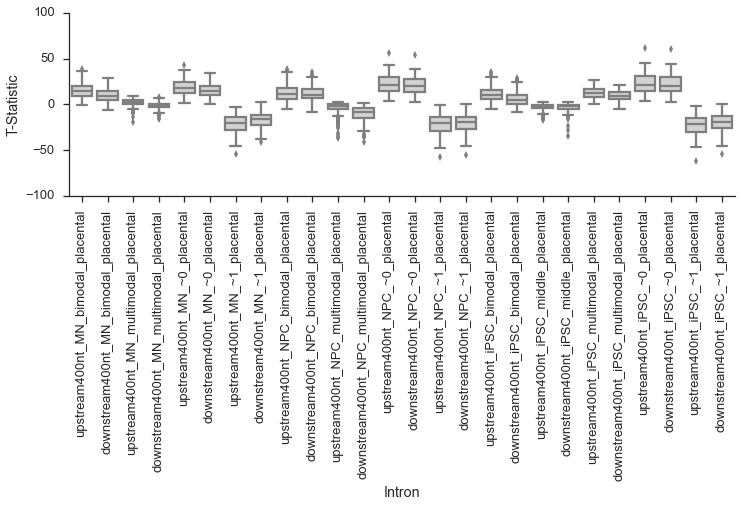

In [87]:
fig, ax = plt.subplots()
sns.boxplot(x='Intron', y='T-Statistic', data=kmer_cisbp_utest_tidy, color='lightgrey')
plt.setp(ax.get_xticklabels(), rotation=90);
sns.despine()
ax.locator_params(nbins=4, axis='y')
fig.tight_layout()
fig.savefig('{}/t_statistic_boxplots.pdf'.format(figure_folder))

In [88]:
t_statistic = kmer_cisbp_utest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
print t_statistic.shape
t_statistic.head()

(297, 26)


Intron,downstream400nt_MN_bimodal_placental,downstream400nt_MN_multimodal_placental,downstream400nt_MN_~0_placental,downstream400nt_MN_~1_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_multimodal_placental,downstream400nt_NPC_~0_placental,downstream400nt_NPC_~1_placental,downstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_middle_placental,...,upstream400nt_MN_~1_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_multimodal_placental,upstream400nt_NPC_~0_placental,upstream400nt_NPC_~1_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_middle_placental,upstream400nt_iPSC_multimodal_placental,upstream400nt_iPSC_~0_placental,upstream400nt_iPSC_~1_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,10.088954,-5.608985,7.977781,-10.497209,8.547288,-9.742422,7.495576,-9.005666,7.312768,2.090122,...,-12.260577,10.131708,0.885288,13.331286,-13.810803,13.384105,-0.020765,4.703707,12.392738,-13.711122
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-5.891437,-3.772377,4.144364,-0.152097,-4.977419,-4.281563,6.153094,-1.883827,-5.023216,-2.051078,...,-4.902047,-4.739791,-11.380533,5.972306,-2.169828,-1.507443,-0.915866,4.382962,6.092475,-5.243198
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,10.779609,-2.108702,14.009194,-15.377036,13.138276,-21.887554,17.764256,-18.084030,9.833285,-0.041267,...,-17.696530,13.830153,1.414468,18.395624,-18.959647,9.775321,-14.058950,10.709617,19.053375,-17.451218
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,16.301866,-0.799196,19.572758,-22.437267,18.357270,-4.430495,25.890769,-25.998674,15.560184,-2.308151,...,-26.963687,20.409000,-1.624575,28.186908,-27.802161,14.686808,-12.960788,17.457671,29.165754,-27.110679
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,16.652326,-1.032309,19.643965,-22.253395,22.811219,-9.086222,19.812022,-23.867131,17.904528,1.032848,...,-23.315113,21.417267,0.057968,15.510699,-21.695448,22.138045,-1.648976,12.068053,16.740526,-21.880212


In [89]:
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
t_statistic_homo_sapiens.head()

(172, 26)


Intron,downstream400nt_MN_bimodal_placental,downstream400nt_MN_multimodal_placental,downstream400nt_MN_~0_placental,downstream400nt_MN_~1_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_multimodal_placental,downstream400nt_NPC_~0_placental,downstream400nt_NPC_~1_placental,downstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_middle_placental,...,upstream400nt_MN_~1_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_multimodal_placental,upstream400nt_NPC_~0_placental,upstream400nt_NPC_~1_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_middle_placental,upstream400nt_iPSC_multimodal_placental,upstream400nt_iPSC_~0_placental,upstream400nt_iPSC_~1_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,10.088954,-5.608985,7.977781,-10.497209,8.547288,-9.742422,7.495576,-9.005666,7.312768,2.090122,...,-12.260577,10.131708,0.885288,13.331286,-13.810803,13.384105,-0.020765,4.703707,12.392738,-13.711122
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-5.891437,-3.772377,4.144364,-0.152097,-4.977419,-4.281563,6.153094,-1.883827,-5.023216,-2.051078,...,-4.902047,-4.739791,-11.380533,5.972306,-2.169828,-1.507443,-0.915866,4.382962,6.092475,-5.243198
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,16.301866,-0.799196,19.572758,-22.437267,18.357270,-4.430495,25.890769,-25.998674,15.560184,-2.308151,...,-26.963687,20.409000,-1.624575,28.186908,-27.802161,14.686808,-12.960788,17.457671,29.165754,-27.110679
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,16.284923,-0.414070,18.120911,-20.590786,21.965496,-16.391639,22.266128,-25.642718,17.470165,-0.698083,...,-24.706194,22.473037,0.823368,21.790071,-26.742043,20.647611,0.419187,12.877269,24.628395,-26.404018
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,12.513823,-2.063971,18.583021,-21.144243,14.401781,-15.194786,24.588478,-24.937874,5.046304,-1.984449,...,-27.781543,15.516172,-4.922756,30.692195,-29.528056,11.162063,-2.532975,16.880238,31.098210,-30.123536


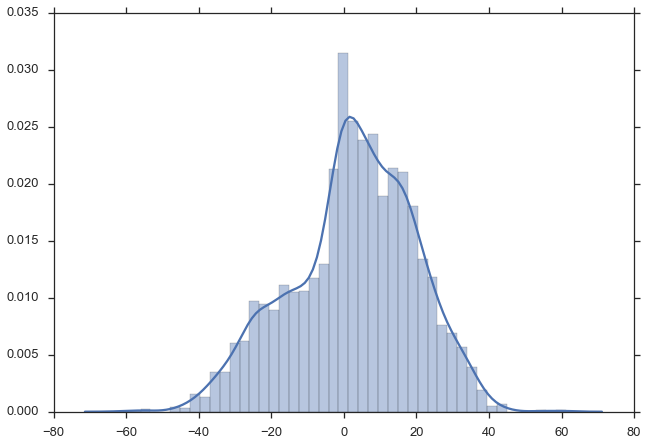

In [90]:
sns.distplot(t_statistic_homo_sapiens.values.flat)

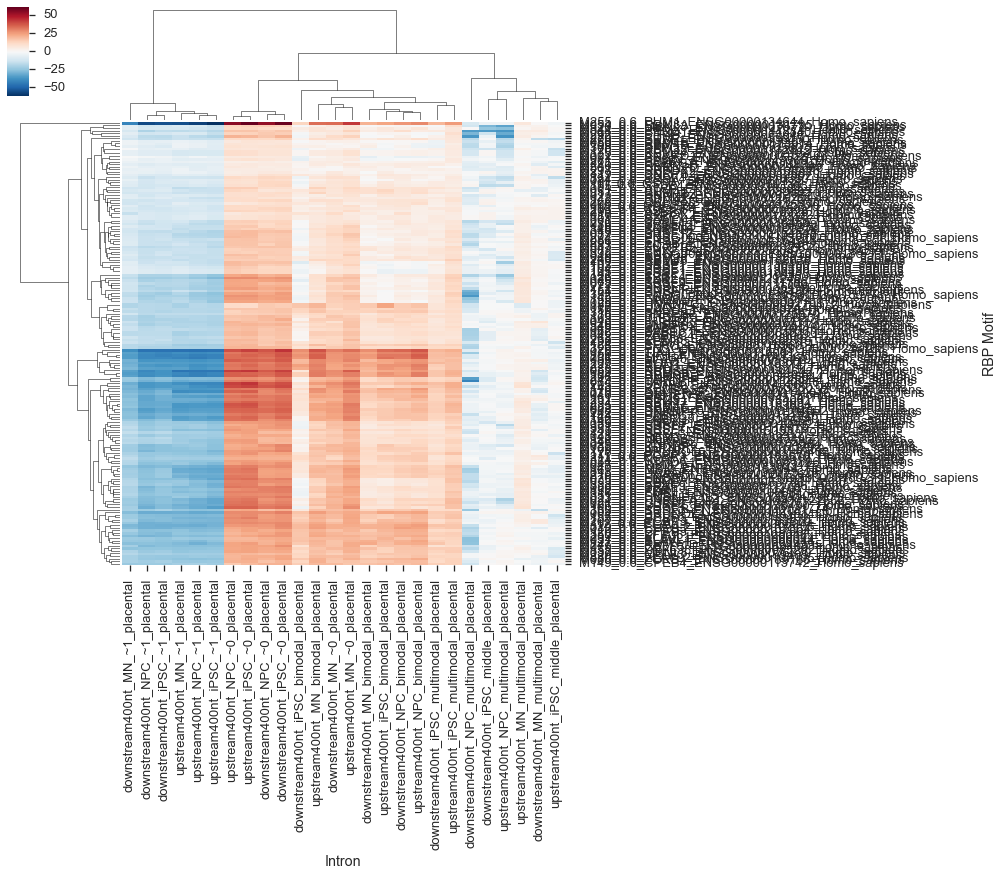

In [91]:
g = sns.clustermap(t_statistic_homo_sapiens)
g.savefig('{}/t_statistic_homo_sapiens_clustermap.pdf'.format(figure_folder))

In [92]:
t_statistic_filtered = t_statistic_homo_sapiens.loc[(t_statistic_homo_sapiens.abs() >= t_statistic_homo_sapiens.std()).sum(axis=1) > 0 ]
# mask = t_statistic_filtered.isnull()
# t_statistic_filtered = t_statistic_filtered.fillna(0)
print t_statistic_filtered.shape
t_statistic_filtered.head()

(171, 26)


Intron,downstream400nt_MN_bimodal_placental,downstream400nt_MN_multimodal_placental,downstream400nt_MN_~0_placental,downstream400nt_MN_~1_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_multimodal_placental,downstream400nt_NPC_~0_placental,downstream400nt_NPC_~1_placental,downstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_middle_placental,...,upstream400nt_MN_~1_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_multimodal_placental,upstream400nt_NPC_~0_placental,upstream400nt_NPC_~1_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_middle_placental,upstream400nt_iPSC_multimodal_placental,upstream400nt_iPSC_~0_placental,upstream400nt_iPSC_~1_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,10.088954,-5.608985,7.977781,-10.497209,8.547288,-9.742422,7.495576,-9.005666,7.312768,2.090122,...,-12.260577,10.131708,0.885288,13.331286,-13.810803,13.384105,-0.020765,4.703707,12.392738,-13.711122
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-5.891437,-3.772377,4.144364,-0.152097,-4.977419,-4.281563,6.153094,-1.883827,-5.023216,-2.051078,...,-4.902047,-4.739791,-11.380533,5.972306,-2.169828,-1.507443,-0.915866,4.382962,6.092475,-5.243198
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,16.301866,-0.799196,19.572758,-22.437267,18.357270,-4.430495,25.890769,-25.998674,15.560184,-2.308151,...,-26.963687,20.409000,-1.624575,28.186908,-27.802161,14.686808,-12.960788,17.457671,29.165754,-27.110679
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,16.284923,-0.414070,18.120911,-20.590786,21.965496,-16.391639,22.266128,-25.642718,17.470165,-0.698083,...,-24.706194,22.473037,0.823368,21.790071,-26.742043,20.647611,0.419187,12.877269,24.628395,-26.404018
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,12.513823,-2.063971,18.583021,-21.144243,14.401781,-15.194786,24.588478,-24.937874,5.046304,-1.984449,...,-27.781543,15.516172,-4.922756,30.692195,-29.528056,11.162063,-2.532975,16.880238,31.098210,-30.123536


In [93]:
sns.set(context='paper', style='whitegrid')
columns = t_statistic_filtered.columns

phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
modality_colors = columns.map(lambda x: MODALITY_TO_COLOR[x.split('_')[2]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [modality_colors, direction_colors, phenotype_colors]

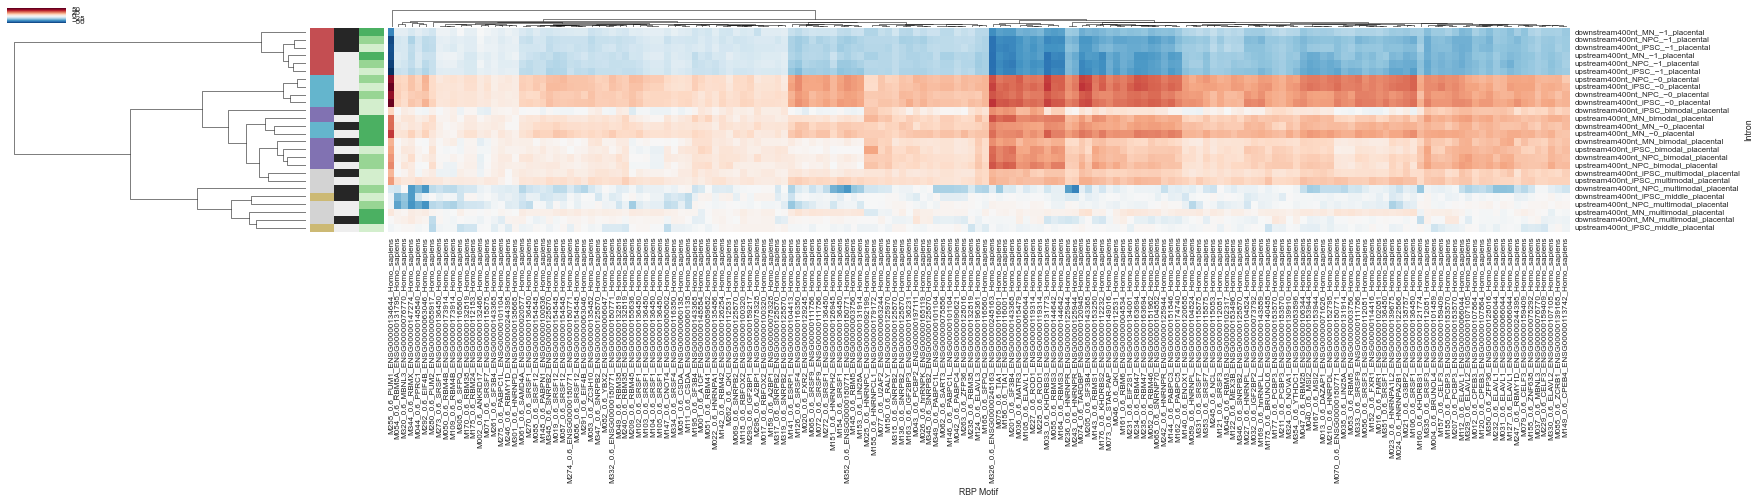

In [94]:
g = sns.clustermap(t_statistic_filtered.T, figsize=(28, 4), row_colors=intron_colors)
g.savefig('{}/intron_kmers_vs_cisbp_t_statistic_filtered_transposed.pdf'.format(figure_folder))

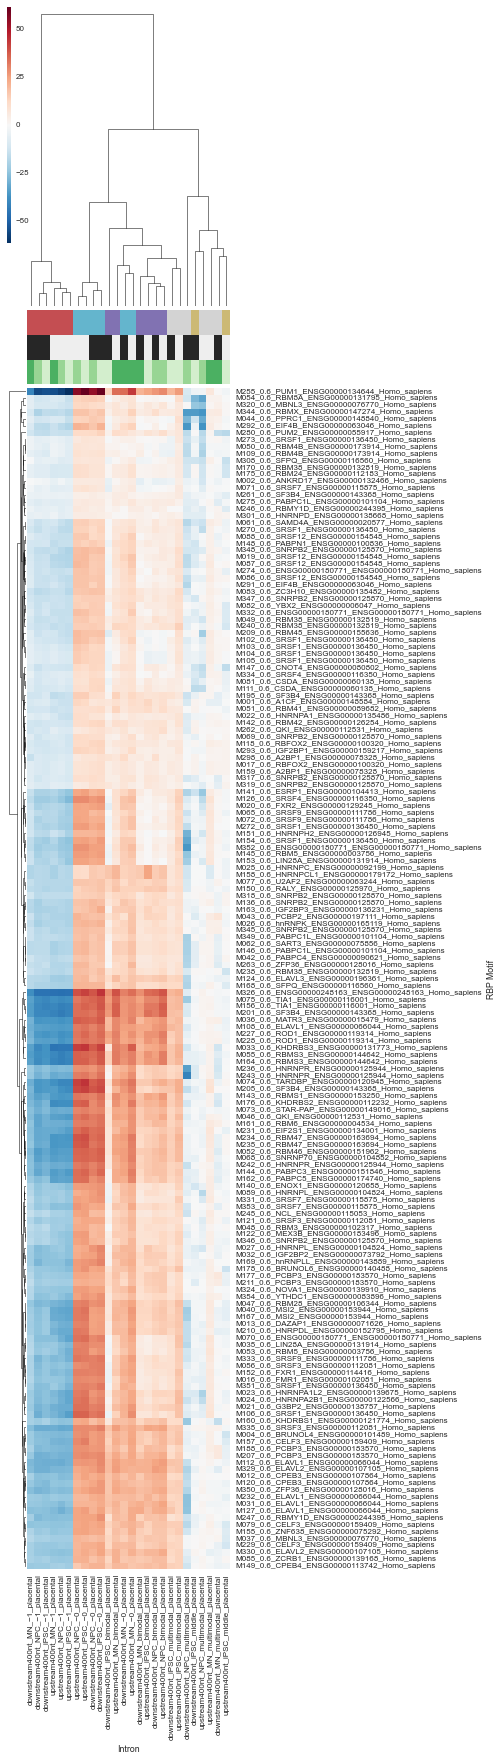

In [95]:
g = sns.clustermap(t_statistic_filtered, figsize=(4, 28), col_colors=intron_colors)
g.savefig('{}/intron_kmers_vs_cisbp_u_statistic_filtered.pdf'.format(figure_folder))

## PCA of CISBP kmers

In [97]:
from sklearn.decomposition import PCA

In [98]:
data = t_statistic_homo_sapiens

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data), 
                       index=data.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
# reduced = reduced
print reduced.shape
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
reduced.head()

(172, 2)


,component_0,component_1
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,30.757988,-18.602773
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,67.599600,2.606109
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-26.039226,-7.368426
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,-20.731504,-15.969311
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,-21.163298,6.764136


In [99]:
gene_names = reduced.index.map(lambda x: x.split('_')[2])
gene_names = [study.expression.feature_data.gene_name[x] if x in study.expression.feature_data.index else x for x in gene_names]
gene_names = [x if x != 'ENSG00000248163' else 'NOVA1' for x in gene_names]

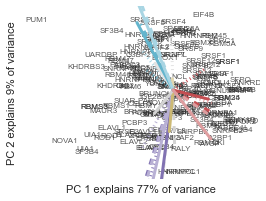

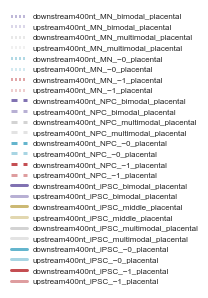

In [103]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))

# ax.set(xlabel='', ylabel='')
# quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
#              'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
#              'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
#              'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}.pdf'.format(utest_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [ ]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)
# for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
#     ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
#             verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca_points.pdf'.format(figure_folder))

ax.set(xlabel='', ylabel='')
quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
             'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
             'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
             'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}_points.pdf'.format(figure_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(utest_folder))


In [97]:
import plotly.plotly as py
import plotly.graph_objs as go


text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []
scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = 'solid'
    elif phenotype == 'NPC':
        linestyle = 'dash'
    else:
        linestyle = 'dot'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
#             print tier, direction, component
#             labels.append(component)
#             ax.plot([0, column[0]], [0, column[1]], label=component, 
#                     linewidth=3, 
#                     color=color, zorder=100, linestyle=linestyle)

plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Motif enrichment in modality k-mers (Mann-Whitney U Test)',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='motif-utest-enrichment-modality-kmers')

In [241]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/kmer_counting'

In [81]:
ax.get_xlim()

(-83.924995384932444, 95.076864663152961)

In [83]:
reduced.apply(np.linalg.norm, axis=1).max()

82.653879265995059

In [75]:
components

Intron,downstream400nt_MN_bimodal_placental,downstream400nt_MN_multimodal_placental,downstream400nt_MN_~0_placental,downstream400nt_MN_~1_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_multimodal_placental,downstream400nt_NPC_~0_placental,downstream400nt_NPC_~1_placental,downstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_middle_placental,...,upstream400nt_MN_~1_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_multimodal_placental,upstream400nt_NPC_~0_placental,upstream400nt_NPC_~1_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_middle_placental,upstream400nt_iPSC_multimodal_placental,upstream400nt_iPSC_~0_placental,upstream400nt_iPSC_~1_placental
0,-0.222783,0.048467,-0.14965,0.238562,-0.261097,0.026959,-0.141195,0.235025,-0.233519,-0.039761,...,0.257387,-0.320314,-0.117104,-0.121152,0.264163,-0.283262,0.007188,-0.090394,-0.152630,0.244552
1,-0.177633,-0.227265,0.15714,-0.010840,-0.184719,-0.224885,0.146938,-0.017415,-0.403262,0.042644,...,-0.170254,-0.235062,0.157556,0.360466,-0.128846,-0.302067,0.057998,0.076756,0.301522,-0.127602


In [369]:
motif_name = 'M255_0.6_PUM1_ENSG00000134644_Homo_sapiens\tM255_0.6_PUM1_ENSG00000134644_Homo_sapiens\t5.0'
cisbp_motifs[motif_name]

,A,C,G,T
0,0.054545,0.636364,0.145455,0.163636
1,0.800000,0.054545,0.018182,0.127273
2,0.163636,-inf,0.818182,0.018182
3,0.163636,0.072727,0.181818,0.581818
4,0.200000,0.127273,0.636364,0.036364
5,0.290909,0.400000,0.090909,0.218182


In [355]:
s = cisbp_kmers['M255_0.6_PUM1_ENSG00000134644_Homo_sapiens\tM255_0.6_PUM1_ENSG00000134644_Homo_sapiens\t5.0']
s[s].sum()

3153

In [300]:
import itertools

for modality, modality_df in study.supplemental.kmer_zscores.groupby(kmer_zscores_metadata['modality'], axis=1):
    print modality, modality_df.shape
    if modality == 'middle' 
    for direction, direction_df in modality_df.groupby(kmer_zscores_metadata['direction'], axis=1):
        print '\t', direction, direction_df.shape
#         print direction_df[direction_df > 0.2].dropna(how='all')
        overenriched = direction_df[direction_df > (direction_df.mean() + 2*direction_df.std())].dropna(how='all')
#         underenriched = direction_df[direction_df < (direction_df.mean() - 2*direction_df.std())].dropna(how='all')
        print '\t\t', ' '.join(overenriched.dropna().index)

bimodal (5365, 6)
	downstream400nt (5365, 3)
		AATT ATTA ATTT GTTT TAAT TATT TTAA TTTC TTTT AGTTT TATTA TATTT TTAAT TTATT TTTAA TTTTC CTTTTT TAAGAG TATTAT TTTAAT TTTTTC
	upstream400nt (5365, 3)
		AAAA ATAT ATTA ATTG ATTT CATT CTGT CTTT TATT TCTT TGTT TTAA TTAT TTCT TTGT TTTA TTTC TTTG ATATT ATTGT CTTTT GTTTT TAAAA TATAT TATTT TCATT TCTGT TGTGC TGTTT TTAAA TTATT TTTCT TTTTG AAAAAT AATTGT ATATTA ATATTT GCTTTT TAAAAA TAAACT TATATT TATTTC TCATAT TGTTTT TTATAC TTCTGT
middle (5365, 2)
	downstream400nt (5365, 1)
		ACTA ACTT ATGT CATG CCGA CGAA CTAC GAGT GCCG GTTA TAAT TACT TTAC AACTT AAGCT AAGGA AATGT AATTC ACAGC ACTAA ACTAC ACTTG ACTTT AGCCG AGCTT AGGTT AGTGT ATAAT ATGAG ATGTA ATGTT ATTCA CAAGC CAGCC CATGA CATGT CCGAA CGAAG CTAAT CTACT CTTGA CTTTT GAAGG GAATG GAGTA GAGTG GCATG GCCGA GCTTT GGAGT GGTTA GTATA GTGTT GTTAC GTTTG TAACT TACTA TACTT TATAA TCAAG TCATG TGAAT TGCAT TGTTA TTAAC TTACT TTCAA TTCAT TTGAA AACTTG AAGCTT AAGGAG AATGTT AATTCA ACAGCC ACTAAT ACTACT ACTTGA ACTTTT AGCCGA AGCTTT AG

In [297]:
overenriched.dropna()

,upstream400nt_MN_~1_placental,upstream400nt_NPC_~1_placental,upstream400nt_iPSC_~1_placental


In [135]:
pwm.idxmax(axis=1)

0    A
1    T
2    A
3    A
4    T
5    T
6    G
dtype: object

In [142]:
%timeit kmers_in_this_pwm = pd.Series(kmers_in_motif(pwm, kmers_list), index=kmers)

1 loops, best of 3: 4.2 s per loop


In [144]:
from kvector.kmer import score_kmers
%timeit pd.Series(score_kmers(pwm, kmers_list), index=kmers)

1 loops, best of 3: 4.22 s per loop


In [139]:
kmers_in_this_pwm['ATAATT']

True

In [140]:
kmers_in_this_pwm[kmers_in_this_pwm]

AATT      True
ATAA      True
ATTA      True
ATTC      True
ATTG      True
ATTT      True
CTAA      True
GTAA      True
TAAT      True
TTAA      True
AATTA     True
AATTC     True
AATTG     True
AATTT     True
ATAAT     True
CTAAT     True
GTAAT     True
TAATT     True
TTAAT     True
ATAATT    True
CTAATT    True
GTAATT    True
TAATTA    True
TAATTC    True
TAATTG    True
TAATTT    True
TTAATT    True
dtype: bool

In [103]:
cisbp_motifs[0]

,A,C,G,T
0,0.395329,0.105514,0.105514,0.393643
1,0.007705,0.007705,0.007705,0.976886
2,0.976886,0.007705,0.007705,0.007705
3,0.976886,0.007705,0.007705,0.007705
4,0.007705,0.007705,0.007705,0.976886
5,0.007705,0.007705,0.007705,0.976886
6,0.321131,0.143804,0.478371,0.056694


In [75]:
kmer_lengths = 4, 5, 6
cisbp_kvector = kvector.motifs_to_kmer_vectors(cisbp_motifs, 'ACGT', kmer_lengths)

In [77]:
cisbp_kvector.to_csv('{}/cisbp_kvector_k=4,5,6.csv'.format(cisbp_folder))

In [362]:
ls $cisbp_folder/*csv

/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_kvector_456.csv


In [364]:
cisbp_kvector = pd.read_csv('{}/cisbp_kvector_456.csv'.format(cisbp_folder), index_col=0)
cisbp_kvector.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens M001_0.6_A1CF_ENSG00000148584_Homo_sapiens 5.0,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens 5.0,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster 5.0,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens 5.0,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans 5.0,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS 5.0,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster 5.0,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes 5.0,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster 5.0,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster 5.0,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens 5.0,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens 5.0,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens 5.0,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens 5.0,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens 5.0,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens 5.0
AAAA,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AAAC,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AAAG,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AAAT,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AACA,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [78]:
cisbp_kvector.shape

(5376, 297)

In [358]:
cisbp_kvector = cisbp_kvector.replace(-np.inf, np.nan)

In [360]:
cisbp_kvector.describe()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens M001_0.6_A1CF_ENSG00000148584_Homo_sapiens 5.0,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens 5.0,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster 5.0,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens 5.0,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans 5.0,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS 5.0,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster 5.0,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes 5.0,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster 5.0,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster 5.0,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens 5.0,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens 5.0,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens 5.0,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens 5.0,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens 5.0,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens 5.0
count,0,0,11.000000,22.000000,4.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108.000000
mean,NaN,NaN,0.539354,0.514626,0.858404,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507716
std,NaN,NaN,0.023932,0.024081,0.040399,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040385
min,NaN,NaN,0.511514,0.474720,0.800638,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402778
25%,NaN,NaN,0.525103,0.497716,0.845690,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481481
50%,NaN,NaN,0.531675,0.514976,0.872009,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.509259
75%,NaN,NaN,0.547432,0.529352,0.884723,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537037
max,NaN,NaN,0.590687,0.566716,0.888961,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592593


In [82]:
cisbp_kvector.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens M001_0.6_A1CF_ENSG00000148584_Homo_sapiens 5.0,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens 5.0,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster 5.0,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens 5.0,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans 5.0,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS 5.0,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster 5.0,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes 5.0,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster 5.0,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster 5.0,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens 5.0,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens 5.0,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens 5.0,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens 5.0,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens 5.0,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens 5.0
AAAA,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AAAC,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AAAG,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AAAT,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
AACA,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [84]:
cisbp_kvector_subset = cisbp_kvector.replace(-np.inf, np.nan).dropna(how='all')
print cisbp_kvector_subset.shape
cisbp_kvector_subset.head()

(980, 297)


,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens M001_0.6_A1CF_ENSG00000148584_Homo_sapiens 5.0,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens 5.0,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster 5.0,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens 5.0,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans 5.0,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS 5.0,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster 5.0,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes 5.0,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster 5.0,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster 5.0,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens 5.0,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens 5.0,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens 5.0,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens 5.0,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens 5.0,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens 5.0,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens 5.0
AAAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
kmer_lengths = 4, 5, 6
kmers = kvector.kmer.make_kmers(kmer_lengths)

In [39]:
kmer_matrix = pd.DataFrame(0, columns=kmers, dtype=int, index=range(len(records)))

for col, record in enumerate(records):
    for k in kmer_lengths:
        for i in range(len(record) - k + 1):
#             print '\t', record[i:(i+k)].seq
            kmer = str(record[i:(i+k)].seq).upper()
            kmer_matrix.loc[col, kmer] += 1

In [40]:
kmer_matrix.mean().dropna()

AAAA      0.354067
AAAC      0.143541
AAAG      0.162679
AAAT      0.234450
AACA      0.110048
AACC      0.071770
AACG      0.047847
AACT      0.148325
AAGA      0.153110
AAGC      0.119617
AAGG      0.114833
AAGT      0.133971
AATA      0.133971
AATC      0.066986
AATG      0.124402
AATT      0.220096
ACAA      0.076555
ACAC      0.062201
ACAG      0.162679
ACAT      0.095694
ACCA      0.100478
ACCC      0.066986
ACCG      0.004785
ACCT      0.119617
ACGA      0.014354
ACGC      0.038278
ACGG      0.014354
ACGT      0.019139
ACTA      0.081340
ACTC      0.081340
            ...   
TTTGAG    0.014354
TTTGAT    0.014354
TTTGCA    0.019139
TTTGCC    0.019139
TTTGCG    0.000000
TTTGCT    0.019139
TTTGGA    0.023923
TTTGGC    0.033493
TTTGGG    0.019139
TTTGGT    0.004785
TTTGTA    0.023923
TTTGTC    0.033493
TTTGTG    0.023923
TTTGTT    0.057416
TTTTAA    0.062201
TTTTAC    0.004785
TTTTAG    0.047847
TTTTAT    0.033493
TTTTCA    0.023923
TTTTCC    0.047847
TTTTCG    0.000000
TTTTCT    0.

In [32]:
len(records)

209

In [27]:
record = records[0]
print record.seq
for k in kmer_lengths:
    for i in range(len(record) - k + 1):
        print '\t', record[i:(i+k)].seq

CACAAAACC
	CACA
	ACAA
	CAAA
	AAAA
	AAAC
	AACC
	CACAA
	ACAAA
	CAAAA
	AAAAC
	AAACC
	CACAAA
	ACAAAA
	CAAAAC
	AAAACC


In [35]:
len(commands)

78

In [31]:
commands[0]

'/home/yeo-lab/software/homer/bin/findMotifsGenome.pl /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/bayesian/exon2_MN_bimodal_placental_foreground.bed hg19 /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/bayesian/homer/exon2_MN_bimodal_placental -bg /projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/bayesian/exon2_MN_bimodal_placental_background.bed -rna -len 4,5,6 -mset vertebrates -mis 0 -p 4 -noweight'

In [32]:
ls $homer_dir

In [27]:
len(commands)

78